### Viral suppresion and coverage for the last 12 months
- Purpose:
    - The purpose of this script will be to generate up-to-date data used to calculate viral load coverage and viral suppression. This will help in data triangulation and data validation.
- Procedures used to clean data:
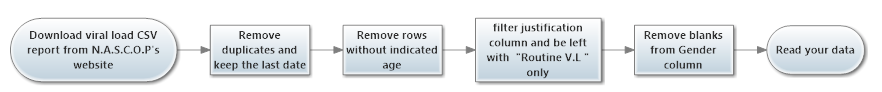

In [1]:
# import pandas
import pandas as pd
import numpy as np

from IPython.display import display
# display all columns 
pd.options.display.max_columns = None

# display all columns 
pd.options.display.max_rows = None

# disable chained assignments
pd.options.mode.chained_assignment = None

df=pd.read_csv('UON CRISSP VL TEST OUTCOMES FOR  IN 01JUL2020  25AUG2021.csv',index_col=None)

df['V.L']=1
# Select the county of your choice
# df=df.loc[df['County']=='Kirinyaga']
# df=df.loc[df['County']=='Kiambu']

In [2]:
# duplicate=df[df.duplicated(['Patient CCC No'], keep=False)].sort_values('Patient CCC No')
# duplicate=duplicate[['Patient CCC No','Date Collected','Result']]
# duplicate.sort_values('Patient CCC No')
# duplicate[duplicate['Patient CCC No']=='1400002009']

In [3]:
# duplicates=duplicate.sort_values('Date Collected').drop_duplicates(['Patient CCC No'], keep='last')
# duplicates.tail().sort_values('Patient CCC No')

In [4]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
''')

#### Remove duplicated and keep the last date

##### before dropping duplicates

In [5]:
print(f"Data set has {len(df['Patient CCC No'])} rows.")

Data set has 35833 rows.


##### after dropping duplicates

In [6]:

# df = df['Patient CCC No'].drop_duplicates(keep='last')
df=df.sort_values('Date Collected').drop_duplicates(['Patient CCC No'], keep='last')
print(f"{len(df['Patient CCC No'])} rows of data are left")

30198 rows of data are left


#### drop all rows without age

In [7]:
df = df[df['Age'].notna()]
print(f"{len(df['Patient CCC No'])} rows of data are left")

29994 rows of data are left


##### Justification left to Routine VL only

In [8]:
df=df[df['Justification']=='Routine VL']
print(f"{len(df['Patient CCC No'])} rows of data are left")

28540 rows of data are left


##### Gender column has only Male and Females

In [9]:
df=df[(df['Gender']=='Female') | (df['Gender']=='Male')]
print(f"{len(df['Patient CCC No'])} rows of data are left. ")

28489 rows of data are left. 


In [10]:
df['Current age']=df['Age']

# customize agebands
df.loc[df['Current age'] <1, 'Current age'] = 1
df.loc[(df['Current age'] >=1) & (df['Current age'] <5), 'Current age'] = 4
df.loc[(df['Current age'] >=5) & (df['Current age'] <10), 'Current age'] = 9
df.loc[(df['Current age'] >=10) & (df['Current age'] <15), 'Current age'] = 14
df.loc[(df['Current age'] >=15) & (df['Current age'] <20), 'Current age'] = 19
df.loc[(df['Current age'] >=20) & (df['Current age'] <25), 'Current age'] = 24
df.loc[(df['Current age'] >=25) & (df['Current age'] <30), 'Current age'] = 29
df.loc[(df['Current age'] >=30) & (df['Current age'] <35), 'Current age'] = 34
df.loc[(df['Current age'] >=35) & (df['Current age'] <40), 'Current age'] = 39
df.loc[(df['Current age'] >=40) & (df['Current age'] <45), 'Current age'] = 44
df.loc[(df['Current age'] >=45) & (df['Current age'] <50), 'Current age'] = 49
df.loc[df['Current age'] >=50, 'Current age'] = 50

In [11]:
def make_crosstab_facility_age(df):
    """This function makes a crosstab"""
#     df=pd.crosstab([df['Facilty'],df['Gender']], [df['Age']],margins=True)
    # create a list with age bands, in the required order
    age=['1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44','45-49', '50+', 'All']
    # Generate crosstab
    df = pd.crosstab([df['Facilty'],df['Gender']], [df['Age']],margins=True)
    # Change order of columns produced by crosstab
    df=df[age]
    return df

# def order_age_columns(df):
#     """This function orders age columns in the crosstabs/contigency tables.
#     columns to order are specified and let all other columns just be themselves"""
#     try:
#         # specify columns in order
#         cols_to_order = ['< 1','1-4', '5-9']
#         # construct a list for new columns by combining the rest of the columns:
#         new_columns = cols_to_order + (df.columns.drop(cols_to_order).tolist())
#         # use the new_columns as other solutions
#         df = df[new_columns]
#     except:
#         pass
    
#     return df

def age_buckets(x):
    """convert age to age ranges"""
    if x == 1: 
        return '< 1' 
    elif x == 4: 
        return '1-4'
    elif x == 9: 
        return '5-9'
    elif x == 14: 
        return '10-14'
    elif x == 19: 
        return '15-19'
    elif x == 24: 
        return '20-24'
    elif x == 29: 
        return '25-29'
    elif x == 34: 
        return '30-34'
    elif x == 39: 
        return '35-39'
    elif x == 44: 
        return '40-44'
    elif x == 49: 
        return '45-49'
    elif x == 50: 
        return '50+'   

In [12]:
# Change age column to fit DATIM requirement
df['Age'] = df['Current age'].apply(age_buckets)
df['months since last VL']=pd.Timestamp.now().normalize() - pd.to_datetime(df['Date Tested'])
# Remove days in days past TCA column and convert to numeric (Days) 
df['months since last VL']=df['months since last VL'].astype('timedelta64[M]')

#### ALL V.L

In [13]:
# Convert date tested column to datetime data type
# df['Date Tested']=pd.to_datetime(df['Date Tested'], dayfirst=True)
# Get Month from date column
df['Month vl Tested']=pd.to_datetime(df['Date Tested']).dt.strftime('%b')
# Get Year from date tested column
df['Year vl Tested']=pd.to_datetime(df['Date Tested']).dt.strftime('%Y')
# combine two columns of text in pandas dataframe
df['period']=df[['Month vl Tested','Year vl Tested']].agg('-'.join, axis=1)
# Capitalize Month name
df["Month"] = df["Month vl Tested"].str.capitalize()
# make it a datetime so that we can sort it: 
# use %b because the data use the abbriviation of month
df["Month"] = pd.to_datetime(df.Month, format='%b', errors='coerce').dt.month
# sort df by month
df = df.sort_values(by="Month")

In [14]:
all_results=pd.crosstab(df['Gender'],[df['Age']],margins=True)
age=['1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44','45-49', '50+', 'All']
all_results[age]

Age,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50+,All
Gender,,,,,,,,,,,,
Female,184,250,425,525,1114,1627,2978,3244,3435,2589,3855,20226
Male,144,214,413,375,311,319,608,901,1268,1333,2377,8263
All,328,464,838,900,1425,1946,3586,4145,4703,3922,6232,28489


#### sub-county VL tested

In [34]:
monthly_vl_trend=df.groupby(['Sub-County','Month','Month vl Tested','period','Year vl Tested']).sum()['V.L'].reset_index().sort_values(['Year vl Tested','Month'])
monthly_vl_trend
# monthly_vl_trend=monthly_vl_trend.pivot_table(values='V.L', index=subcounty_vl['Sub-County'], columns='V.L', aggfunc='first')
monthly_vl_trend
dfsss = pd.crosstab(df['Sub-County'], [df['Age']],margins=True)
age=['1-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44','45-49', '50+', 'All']
dfsss[age].sort_values('All')

Age,1-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50+,All
Sub-County,,,,,,,,,,,,
Kikuyu,3,5,4,6,17,43,52,53,44,33,54,314
Lari,7,6,9,14,21,23,68,58,75,70,71,422
Kirinyaga North,2,7,10,9,41,52,99,102,91,75,84,572
Kabete,21,19,30,18,57,81,129,128,140,92,127,842
Kirinyaga East,11,13,27,33,33,43,99,115,158,112,209,853
Juja,20,31,27,30,59,102,130,153,183,119,217,1071
Gatundu North,11,15,47,39,53,54,110,137,169,156,320,1111
Githunguri,18,31,43,39,55,54,130,164,197,171,295,1197
Limuru,7,20,48,25,38,76,144,169,216,172,283,1198


## sort data into several dfs

In [16]:
# copy facility df
df=df.copy()
# filter LDL
df_LDL=df[df['Result']=='< LDL copies/ml']

# # filter other(this includes HVL, BLANKS AND LLV)
df_others=df[df['Result']!='< LDL copies/ml']

# # copy df others 
df_others=df_others.copy()

# filter collect new sample
df_collect_new_sample=df_others[df_others['Result']=='Collect New Sample']

# remove collect new sample
df_others=df_others[df_others['Result']!='Collect New Sample']

# filter blanks
no_vl_done=df_others[pd.isnull(df_others['Result'])]

# replace all blanks with no vl done
no_vl_done['Result']="NO VL DONE"

# filter nonblanks
df_notblanks=df_others[pd.notnull(df_others['Result'])]

# convert nonblank values to numbers
df_notblanks['Result']=pd.to_numeric(df_notblanks['Result'])

# filter LLV
newdf_LDL=df_notblanks[df_notblanks['Result']<1000]
# df_others['Result'].unique()

## customize result column

In [17]:
# replace all < LDL copies/ml with LDL
df_LDL.loc[df_LDL['Result'] =='< LDL copies/ml', 'Result'] = "LDL"

# replace all blanks with no vl done
df_collect_new_sample['Result']="NO VL"

# replace all < LDL copies/ml with LDL
# df_collect_new_sample.loc[df_collect_new_sample['Result'] =='Collect New Sample'] = "NO VL V.L"

# replace all LLV with LDL
newdf_LDL.loc[newdf_LDL['Result'] < 1000, 'Result'] = "LDL"

# filter VL >1000
newdf_HVL=df_notblanks[df_notblanks['Result']>=1000]

# replace all >1000 with HVL
newdf_HVL.loc[newdf_HVL['Result'] > 1000, 'Result'] = "HVL"

# join LDL + LLV + HVL+ NO VL DONE + collect new sample
new_df = pd.concat([df_LDL,newdf_LDL,newdf_HVL,no_vl_done,df_collect_new_sample])
# new_df.head()

## join local df

In [18]:
# join LDL + LLV 
ldl = pd.concat([df_LDL,newdf_LDL])

# join no vl V.L
repeat_viral_load = pd.concat([df_collect_new_sample,no_vl_done])

#### DSD: TX _PVLS (NUMERATOR) 
Number of adults and pediatrics patients on ART with suppressed viral load V.L (<1,000 copies/ml) documentation in the medical records and/or supporting laboratory V.L within the past 12 months

In [19]:
# make_crosstab_facility_age(ldl)
# ldl_df = df.groupby(["Facilty",'Gender']).Age.value_V.L()
# ldl_df

make_crosstab_facility_age(ldl)

Age                                                1-4  5-9  10-14  15-19  \
Facilty                                    Gender                           
Aid Intergrated Programme Mangu Dispensary Female    2    0      2      2   
                                           Male      3    0      6      5   
Anmer Dispensary                           Female    0    0      0      0   
                                           Male      0    0      0      0   
Baricho Health Centre                      Female    1    4      2      2   
                                           Male      0    1      3      2   
Beta Care Nursing Home                     Female    0    0      0      0   
                                           Male      0    3      2      1   
Cianda Dispensary                          Female    1    2      0      0   
                                           Male      1    0      0      0   
Difathas Health Centre                     Female    1    2      1      4   
                                           Male      0    2      9      1   
Gachege Dispensary                         Female    1    0      0      0   
                                           Male      0    0      1      0   
Gachika Dispensary                         Female    0    0      0      0   
Gachororo Health Centre                    Female    8    3      2      7   
                                           Male      1    5      0      0   
Gakoe Dispensary                           Female    0    3      6      5   
                                           Male      0    1      2      2   
Gathambi Dispensary                        Female    0    0      0      2   
                                           Male      0    0      2      0   
Gathanga Dispensary                        Female    0    0      0      0   
                                           Male      0    2      0      0   
Gathigiriri Dispensary                     Female    1    2      2      1   
                                           Male      1    1      3      0   
Gatundu District Hospital                  Female    4    8     16     19   
                                           Male      7    4     22     12   
Gatwe Dispensary                           Female    0    1      0      0   
                                           Male      0    0      0      0   
Gichuru Dispensary                         Female    0    2      0      4   
                                           Male      1    2      0      1   
Gitare Dispensary (Gatundu)                Female    0    1      8      1   
                                           Male      1    6      3      0   
Githiga Health Centre                      Female    2    2      3      1   
                                           Male      0    1      7      1   
Githunguri  Dispensary                     Female    1    3      2      5   
                                           Male      1    1      1      3   
Githunguri Health Centre                   Female    2    6      1      9   
                                           Male      2    4      6      6   
Hamundia Dispensary                        Female    2    2      2      0   
                                           Male      2    1      0      2   
Igegania Health Centre                     Female    0    4      7      9   
                                           Male      2    4      9      9   
Immaculate Heart of Mary Hospital          Female    1    1     13      4   
                                           Male      0    2      9      4   
JKUAT Hospital                             Female    0    1      4      8   
                                           Male      0    2      2      5   
Juja Farm Dispensary                       Female    1    0      4      0   
                                           Male      0    1      1      2   
Kabare Health Centre                       Female    1    1      2      7

#### DSD: TX _PVLS (DENOMINATOR) 
Number of adults and pediatrics ART patients with a viral load V.L documented in the patient medical records and/or laboratory records in the past 12 months.

In [32]:
vl_done=df.loc[(new_df['months since last VL']<=12)]
make_crosstab_facility_age(vl_done)

Age                                                1-4  5-9  10-14  15-19  \
Facilty                                    Gender                           
Aid Intergrated Programme Mangu Dispensary Female    3    0      2      3   
                                           Male      3    0      6      5   
Anmer Dispensary                           Female    0    0      0      0   
                                           Male      1    0      0      0   
Baricho Health Centre                      Female    1    5      2      3   
                                           Male      0    1      3      3   
Beta Care Nursing Home                     Female    0    0      0      0   
                                           Male      0    3      2      1   
Cianda Dispensary                          Female    1    2      0      0   
                                           Male      1    0      0      0   
Difathas Health Centre                     Female    1    2      1      5   
                                           Male      0    1      9      1   
Gachege Dispensary                         Female    1    0      0      0   
                                           Male      0    0      1      1   
Gachika Dispensary                         Female    0    0      0      0   
Gachororo Health Centre                    Female    8    3      2      8   
                                           Male      2    7      2      0   
Gakoe Dispensary                           Female    0    4      5      6   
                                           Male      0    0      2      2   
Gathambi Dispensary                        Female    0    0      0      2   
                                           Male      0    0      2      0   
Gathanga Dispensary                        Female    1    0      0      0   
                                           Male      0    2      0      0   
Gathigiriri Dispensary                     Female    1    2      1      1   
                                           Male      1    2      3      0   
Gatundu District Hospital                  Female    4    9     16     22   
                                           Male     10    4     23     20   
Gatwe Dispensary                           Female    0    1      0      0   
                                           Male      0    0      0      0   
Gichuru Dispensary                         Female    0    2      1      2   
                                           Male      1    2      0      1   
Gitare Dispensary (Gatundu)                Female    0    1     10      3   
                                           Male      1    6      3      0   
Githiga Health Centre                      Female    2    2      3      1   
                                           Male      0    1      8      2   
Githunguri  Dispensary                     Female    1    4      3      6   
                                           Male      1    1      2      6   
Githunguri Health Centre                   Female    2    7      2     11   
                                           Male      3    3      8      7   
Hamundia Dispensary                        Female    2    2      2      0   
                                           Male      1    1      0      1   
Igegania Health Centre                     Female    0    3      8     10   
                                           Male      4    4      9      9   
Immaculate Heart of Mary Hospital          Female    1    1     13      5   
                                           Male      1    2      9      4   
JKUAT Hospital                             Female    0    3      5      8   
                                           Male      0    3      2      5   
Juja Farm Dispensary                       Female    2    1      3      0   
                                           Male      1    2      1      2   
Kabare Health Centre                       Female    1    1      1      7

# VIRAL LOAD SUPPRESSION RATE

In [21]:
vs_rate=round((len(ldl)/(len(newdf_HVL)+len(ldl)+len(repeat_viral_load)))*100,1)
print(f'vl_suppresion is {vs_rate} %. {len(newdf_HVL)} had high viral load')

vl_suppresion is 94.4 %. 1498 had high viral load


#### Sub-county V.S

In [28]:
subcounty_vl=new_df.groupby(['County',"Sub-County",'Result']).sum()['V.L'].reset_index()
subcounty_vl=subcounty_vl.pivot_table(values='V.L', index=subcounty_vl[['County','Sub-County']], columns='Result', aggfunc='first')
# subcounty_vl['Viral Suppression %'] = round((subcounty_vl['LDL']/(subcounty_vl['HVL']+subcounty_vl['LDL'])) * 100,)
# subcounty_vl.fillna(0).sort_values('Viral Suppression %',ascending=False).astype(int)


subcounty_vl=subcounty_vl.fillna(0)
subcounty_vl['Viral Suppression %'] = round((subcounty_vl['LDL']/(subcounty_vl['HVL']+subcounty_vl['LDL'])) * 100,)
subcounty_vl=subcounty_vl.sort_values('Viral Suppression %',ascending=False).astype(int)
subcounty_vl['Viral Suppression %']=subcounty_vl['Viral Suppression %'].astype(str)+"%"
subcounty_vl

Result                               1000  HVL   LDL  NO VL  NO VL DONE  \
County    Sub-County                                                      
Kirinyaga Kirinyaga South               0   68  1687      1           1   
Kiambu    Limuru                        0   46  1149      3           0   
Kirinyaga Kirinyaga North/Mwea West     0   54  1201      0           0   
          Kirinyaga Central             0   82  2084      3           0   
          Kirinyaga East                0   45   805      3           0   
Kiambu    Thika Town                    0  338  6165     44           5   
          Gatundu North                 0   50  1060      1           0   
          Kiambu town                   1  139  2572      7           0   
          Kiambaa                       0   57  1176      3           0   
          Lari                          0   23   399      0           0   
          Ruiru                         0  206  3088      6           0   
          Kabete                        0   47   792      3           0   
Kirinyaga Kirinyaga North               0   37   534      1           0   
Kiambu    Githunguri                    0   76  1119      2           0   
          Gatundu South                 0  133  1786      2           0   
          Juja                          0   70   999      2           0   
          Kikuyu                        0   26   287      1           0   

Result                              Viral Suppression %  
County    Sub-County                                     
Kirinyaga Kirinyaga South                           96%  
Kiambu    Limuru                                    96%  
Kirinyaga Kirinyaga North/Mwea West                 96%  
          Kirinyaga Central                         96%  
          Kirinyaga East                            95%  
Kiambu    Thika Town                                95%  
          Gatundu North                             95%  
          Kiambu town                               95%  
          Kiambaa                                   95%  
          Lari                                      95%  
          Ruiru                                     94%  
          Kabete                                    94%  
Kirinyaga Kirinyaga North                           94%  
Kiambu    Githunguri                                94%  
          Gatundu South                             93%  
          Juja                                      93%  
          Kikuyu                                    92%

#### Facility V.S

In [30]:
subcounty_vl=new_df.groupby(["Facilty",'Result']).sum()['V.L'].reset_index()
subcounty_vl=subcounty_vl.pivot_table(values='V.L', index=subcounty_vl['Facilty'], columns='Result', aggfunc='first')
# subcounty_vl['Viral Suppression %'] = round((subcounty_vl['LDL']/(subcounty_vl['HVL']+subcounty_vl['LDL'])) * 100,)
subcounty_vl=subcounty_vl.fillna(0)
subcounty_vl['Viral Suppression %'] = round((subcounty_vl['LDL']/(subcounty_vl['HVL']+subcounty_vl['LDL'])) * 100,)
subcounty_vl=subcounty_vl.sort_values('Viral Suppression %',ascending=False).astype(int)
subcounty_vl['Viral Suppression %']=subcounty_vl['Viral Suppression %'].astype(str)+"%"
subcounty_vl

Result,1000,HVL,LDL,NO VL,NO VL DONE,Viral Suppression %
Facilty,,,,,,
Warazo Clinic (Thika),0,0,15,0,0,100%
Beta Care Nursing Home,0,0,65,0,0,100%
Gachika Dispensary,0,0,2,0,0,100%
Kandongu Dispensary,0,0,14,0,0,100%
Kagaa Dispensary,0,0,12,0,0,100%
Ngorongo Health Centre,0,1,181,0,0,99%
Limuru Health Centre,0,3,230,1,0,99%
Kangu Dispensary,0,1,86,0,0,99%
Hamundia Dispensary,0,2,118,0,0,98%


#### Monthly viral load trend

In [24]:
def make_bar_chart(df,x,y,title):
    ax = df.plot.bar(x=x, y=y, rot=0,figsize=(17,5),title=title)

    # annotate my bars
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center',va='center', xytext=(0, 10),textcoords='offset points')
    return ax

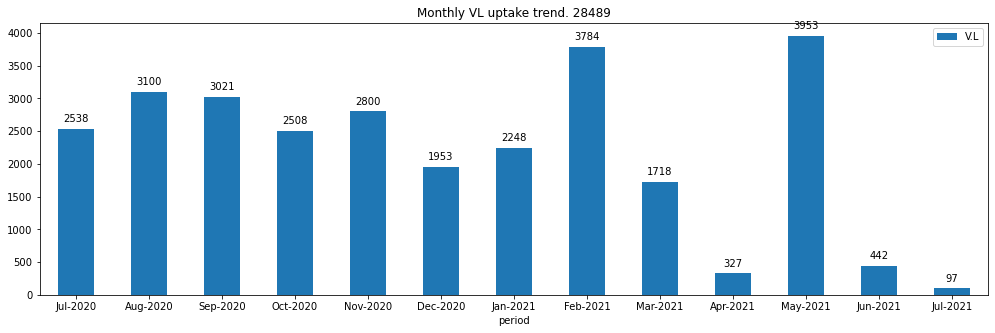

In [25]:

# summarize data by groupby
monthly_vl_trend=df.groupby(['Month','Month vl Tested','period','Year vl Tested']).sum()['V.L'].reset_index().sort_values(['Year vl Tested','Month'])
# plot data in bar charts
make_bar_chart(monthly_vl_trend,'period','V.L',f"Monthly VL uptake trend. {len(df['Patient CCC No'])}");


#### Weekly trend

In [26]:
df.head()
df['count']=1
df['Date Tested'] = pd.to_datetime(df['Date Tested'])
df1 = df.groupby(pd.Grouper(freq='W', key='Date Tested'))['count'].sum().reset_index()
total_vl=df1['count'].sum()
avg_sample_tested=sum(df1['count'])/len(df1['count'])
df1[-5:]


,Date Tested,count
52,2021-07-04,0
53,2021-07-11,88
54,2021-07-18,0
55,2021-07-25,0
56,2021-08-01,9


Average weekly sample tested: 500
Minimum weekly sample tested: 0
Maximum weekly sample tested: 1950


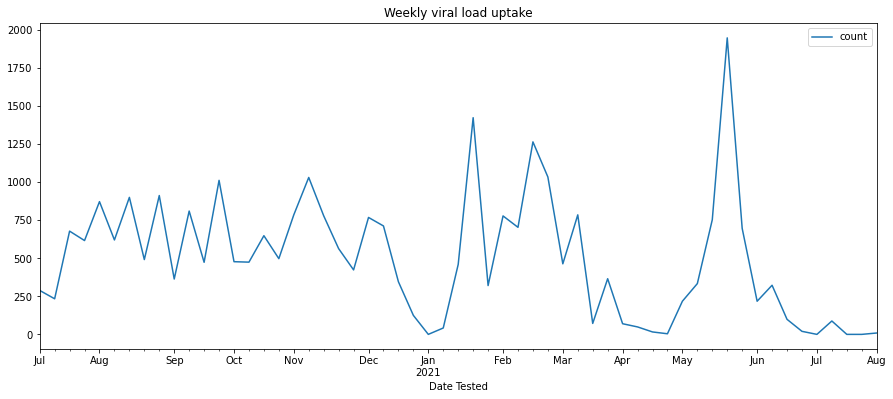

In [27]:
print(f"Average weekly sample tested: {round(avg_sample_tested,)}")
print(f"Minimum weekly sample tested: {min(df1['count'])}")
print(f"Maximum weekly sample tested: {max(df1['count'])}")
df1.plot(kind='line',x='Date Tested',y='count',figsize=(15,6), title="Weekly viral load uptake");